In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market(3).csv')

#drop null
df = df.dropna(how='all')
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,37388912.0,Executive Assistant,V/Line Corporation,2018-10-04T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Administration & Office Support,"PA, EA & Secretarial",The Executive Assistant will provide high leve...,"<p>V/Line, Victoria's largest regional passeng...",50.0,60.0,Full Time
10095,37388903.0,Payroll Officer - Neller Preceda,Hays Accountancy & Finance,2018-10-04T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Accounting,Payroll,Neller Preceda Payroll Officer Jobs Melbourne,NaN,50.0,60.0,NaN
10096,37388901.0,Receptionist / Administrator,Randstad - Business Support,2018-10-04T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Administration & Office Support,Administrative Assistants,Dual position within the Engineering & Commerc...,<p>Randstad are currently recruiting for a ver...,50.0,60.0,Full Time
10097,37388898.0,INTERNATIONAL WHOLESALE TRAVEL CONSULTANT,AA Appointments Brisbane,2018-10-04T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Travel Agents/Consultants,Travel consultants - utilise your product know...,<p>Travel consultants - utilise your product k...,50.0,60.0,Full Time


In [4]:
len(df)

10099

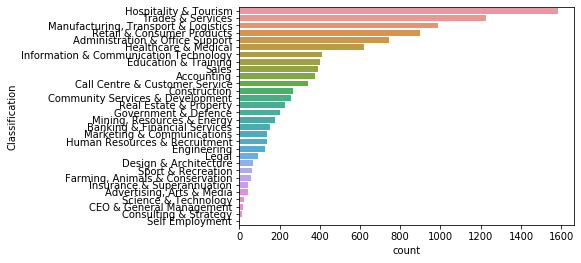

In [5]:
%matplotlib inline

#job by Industry
df2 = df.sort_values("Classification", ascending=False)
df2



#using Seaborn    
sns.countplot(y=df["Classification"], order=df['Classification'].value_counts().index)

#Using matplotlib
#df['Classification'].value_counts().plot(kind="barh")



In [6]:
import matplotlib
#create dataframe for salary ranges

salary_range = df.groupby('LowestSalary').count()
salary_range.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType
LowestSalary,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821


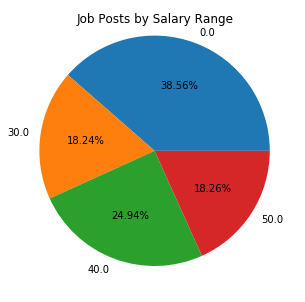

In [26]:
#salary ranges plot

# using plot
#salary_range.plot(kind="pie", y='HighestSalary', autopct='%1.2f%%')

#using .pie
fig = plt.figure()
fig.add_axes([0,0,1,1])
plt.pie(salary_range['Id'], labels = salary_range.index, autopct='%1.2f%%')
plt.suptitle('Job Posts by Salary Range')
plt.show()

In [28]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head(10)

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19
Alice Springs & Central Australia,17,17,14,17,0,17,17,17,17,17,17,17,Alice Springs & Central Australia,17
Bairnsdale & Gippsland,18,18,17,18,0,18,18,18,18,18,18,18,Bairnsdale & Gippsland,18
Ballarat & Central Highlands,46,46,46,46,0,46,46,46,42,46,46,42,Ballarat & Central Highlands,46
"Bendigo, Goldfields & Macedon Ranges",46,46,43,46,0,46,46,46,44,46,46,44,"Bendigo, Goldfields & Macedon Ranges",46


Text(50.0, 0.5, '')

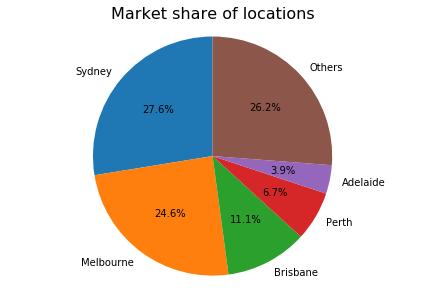

In [14]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

